In [1227]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt

# machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor

from sklearn import svm

import tensorflow as tf
import math
import csv

train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
combine = [train_df, test_df]


In [1228]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [1229]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1230]:
train_df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [1231]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1232]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1233]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [1234]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [1235]:
test_df.loc[pd.isna(test_df['Fare']), :]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [1236]:
test_df.loc[pd.isna(test_df['Fare']), 'Fare']=test_df['Fare'].median()
test_df.loc[152, :]

PassengerId                  1044
Pclass                          3
Name           Storey, Mr. Thomas
Sex                          male
Age                          60.5
SibSp                           0
Parch                           0
Ticket                       3701
Fare                      14.4542
Cabin                         NaN
Embarked                        S
Name: 152, dtype: object

In [1237]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [1238]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [1239]:
#add cabin character
for dataset in combine:
    dataset['Cabin']=dataset['Cabin'].map(lambda x:  'X' if pd.isna(x) else x[0])


In [1240]:
train_df['Cabin'].describe()

count     891
unique      9
top         X
freq      687
Name: Cabin, dtype: object

In [1241]:
test_df['Cabin'].describe()

count     418
unique      8
top         X
freq      327
Name: Cabin, dtype: object

['D', 'A', 'F', 'B', 'E', 'C', 'X', 'G', 'T']

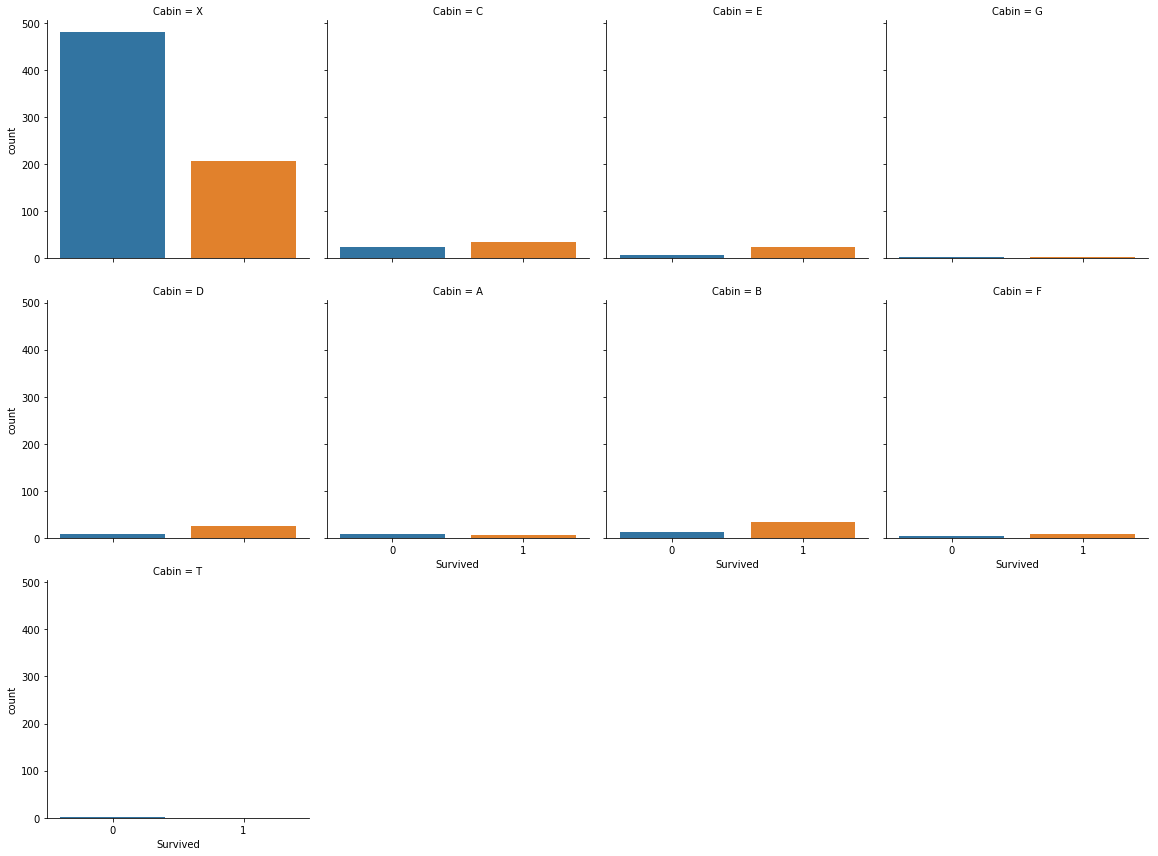

In [1242]:
#map cabin
full=train_df.append(test_df, ignore_index=True)

sns.factorplot('Survived', col='Cabin',  col_wrap=4, data=train_df, kind='count')
cabins=full['Cabin'].tolist();
cabins=set(cabins)
cabin_map=dict(zip(cabins, np.arange(0, len(cabins))))

for dataset in combine:
    dataset['Cabin']=dataset['Cabin'].map(cabin_map)

list(cabins)

In [1243]:
#train_df=train_df.drop('Cabin', axis=1)

In [1244]:
#test_df=test_df.drop('Cabin', axis=1)

In [1245]:
train_df.info()
print('-'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       889 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null 

In [1246]:
train_df.loc[pd.isna(train_df['Embarked']), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,3,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,3,NaN


In [1247]:
train_df.loc[[61, 829], 'Embarked']='C'

In [1248]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null object
dtypes: float64(2), int64(6), object(4)
memory usage: 83.6+ KB


In [1249]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          418 non-null int64
Embarked       418 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


In [1250]:
full_df=train_df.append(test_df, ignore_index=True)
title=dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
title=list(set(title))
title

['Master', 'Dona', 'Mr', 'Miss', 'Rev', 'Dr', 'Ms', 'Col', 'Mrs']

[1, 2, 3, 4, 5]

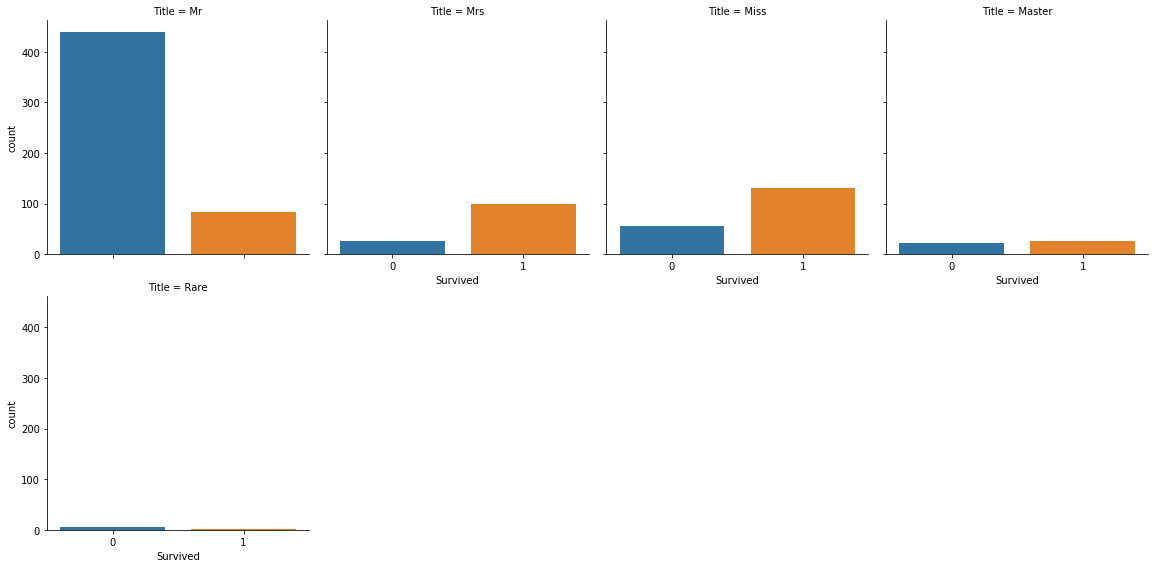

In [1251]:
#add Title

combine=[train_df, test_df]

for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

for dataset in combine:
    dataset['Title']=dataset['Title'].replace(['Jonkheer', 'Dr'], 'Master')
    dataset['Title'] = dataset['Title'].replace(['Ms', 'Mlle'], 'Miss')
    dataset['Title'] = dataset['Title'].replace(['Mme', 'Dona'], 'Mrs')
    dataset['Title']=dataset['Title'].replace(['Don', 'Sir', 'Major', 'Col', 'Capt'], 'Mr')
    dataset['Title'] = dataset['Title'].map(lambda x: 'Rare' if x not in ['Master', 'Miss', 'Mrs', 'Mr'] else  x)
    
sns.factorplot('Survived', col='Title',  col_wrap=4, data=train_df, kind='count')
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    #dataset['Title'] = dataset['Title'].fillna(0)

list(set(train_df['Title'].tolist()))


In [1252]:
# add family

for dataset in combine:
    dataset['FamilySize']=0
    for idx, row in dataset.iterrows():
        dataset.loc[idx, 'FamilySize']=dataset.loc[idx, 'SibSp']+dataset.loc[idx, 'Parch']+1


train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null object
Title          891 non-null int64
FamilySize     891 non-null int64
dtypes: float64(2), int64(8), object(4)
memory usage: 97.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
T

In [1253]:
#map sex
sex_map={'male':0, 'female':1}
for dataset in combine:
    dataset['Sex']=dataset['Sex'].map(sex_map)

#embarked map
em_map={'S':0, 'C':1, 'Q':2}
for dataset in combine:
    dataset['Embarked']=dataset['Embarked'].map(em_map)
    
train_df.info()
print('-'*50)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
Title          891 non-null int64
FamilySize     891 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 97.5+ KB
--------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            332 non-null float64
SibSp          418 n

In [1254]:
# add TicketShare

total_df=train_df.append(test_df, ignore_index=True)
total_df['TicketShare']=0
cnt=total_df.groupby('Ticket').count()

for dataset in [train_df, test_df]:
    dataset['TicketShare']=0
    for idx , row in dataset.iterrows():
        if (cnt.loc[row['Ticket'],  'TicketShare']>1):
            dataset.loc[idx, 'TicketShare']=1
        #dataset.loc[idx, 'TicketShare']=cnt.loc[row['Ticket'],  'TicketShare']

        

In [1255]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,TicketShare
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,6,2,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,6,0,3,2,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,6,2,1,1,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,6,0,1,1,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,6,0,3,3,1


In [1256]:
#fill age

def guess_age_median(train_df):
    train_age_valid=train_df.groupby(['Pclass', 'Sex']).median()['Age']
    train_age_valid=np.floor(train_age_valid/0.5+0.5)*0.5
    return train_age_valid

def fill_age_median(fill_series, df_miss):
    for idx, row in df_miss.iterrows():
        if pd.isna(row['Age']):
            df_miss.loc[idx, 'Age']=fill_series.loc[row['Pclass'], row['Sex']]

age_regres_feat=['Pclass', 'Sex', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Embarked', 'Title']
def age_predictor(train_df):
    dt_est=DecisionTreeRegressor(max_depth=8, min_samples_leaf=3, random_state=102)
    et_est=ExtraTreesRegressor(n_estimators=2000, max_depth=8, min_samples_leaf=3, random_state=42)
    gbm_est=GradientBoostingRegressor(learning_rate=0.008, n_estimators=2000, max_depth=8, 
                                      min_samples_leaf=3, random_state=42)
    models=[dt_est];
    #model=RandomForestRegressor(n_estimators=2000, max_depth=10, min_samples_leaf=3, random_state=102)
    for model in models:
        model.fit(train_df.loc[:, age_regres_feat], train_df.loc[:, 'Age'])
    return models

def age_pred(models, df):
    df_age_null=df.loc[pd.isna(df.loc[:, 'Age']),age_regres_feat]
    #df.loc[pd.isna(df.loc[:, 'Age']), 'Age']=model.predict(df_age_null)
    age_guess=0
    for model in models:
        age_guess=model.predict(df_age_null)+age_guess
    age_guess/=len(models)
    df.loc[pd.isna(df.loc[:, 'Age']), 'Age']=np.floor(age_guess/0.5+0.5)*0.5
    
    
all_feat=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Embarked', 'Title']    
fill_ser=guess_age_median(train_df)

train_df_age_valid=train_df.loc[pd.notna(train_df.loc[:, 'Age']), all_feat]
age_model=age_predictor(train_df_age_valid)


#fill_age_median(fill_ser, train_df)
#fill_age_median(fill_ser, test_df)

age_pred(age_model, train_df)
age_pred(age_model, test_df)

train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null int64
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          891 non-null int64
Embarked       891 non-null int64
Title          891 non-null int64
FamilySize     891 non-null int64
TicketShare    891 non-null int64
dtypes: float64(2), int64(11), object(2)
memory usage: 104.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Pa

In [1257]:
#add Surname
df_total=train_df.append(test_df, ignore_index=True)
df_total['Surname']=df_total['Name'].map(lambda s:  s.split('.')[0].split(',')[0].strip())

surname_cnt=df_total.groupby('Surname').count()


for dataset in combine:
    dataset['Surname']=0
    for idx, row in dataset.iterrows():
        surname=row['Name']
        surname=surname.split('.')[0].split(',')[0].strip()
        if dataset.loc[idx, 'FamilySize']<=2:
            dataset.loc[idx, 'Surname']='Small'
        else:
            dataset.loc[idx, 'Surname']=surname
            


In [1258]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,TicketShare,Surname
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,6,0,1,2,0,Small
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,5,1,3,2,1,Small
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,6,0,2,1,0,Small
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,5,0,3,2,1,Small
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,6,0,1,1,0,Small


In [1259]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,TicketShare,Surname
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,6,2,1,1,0,Small
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,6,0,3,2,0,Small
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,6,2,1,1,0,Small
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,6,0,1,1,0,Small
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,6,0,3,3,1,Hirvonen


In [1260]:
#map surname
surname_list=surname_cnt.index.tolist()
surname_list.append('Small')
surname_list=set(surname_list)
surname_id=np.arange(0, len(surname_list))
surname_map=dict(zip(surname_list, surname_id))

for dataset in combine:
    dataset['Surname']=dataset['Surname'].map(surname_map)

    

In [1261]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,FamilySize,TicketShare,Surname
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,6,2,1,1,0,132
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,6,0,3,2,0,132
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,6,2,1,1,0,132
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,6,0,1,1,0,132
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,6,0,3,3,1,736
5,897,3,"Svensson, Mr. Johan Cervin",0,14.0,0,0,7538,9.2250,6,0,1,1,0,132
6,898,3,"Connolly, Miss. Kate",1,30.0,0,0,330972,7.6292,6,2,2,1,0,132
7,899,2,"Caldwell, Mr. Albert Francis",0,26.0,1,1,248738,29.0000,6,0,1,3,1,584
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",1,18.0,0,0,2657,7.2292,6,1,3,1,0,132
9,901,3,"Davies, Mr. John Samuel",0,21.0,2,0,A/4 48871,24.1500,6,0,1,3,1,476


In [1267]:
# classification
feat=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'FamilySize', 'Fare', 'Embarked',
      'Title', 'TicketShare', 'Surname', 'Cabin']
#feat=['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked',
#      'Title', 'TicketShare', 'Surname', 'Cabin']



X_train=train_df.loc[:, feat].astype(np.float32)
Y_train=train_df.loc[:, 'Survived']
X_test=test_df.loc[:, feat].astype(np.float32)
rf_est=RandomForestClassifier(n_estimators=2000,  
                                                     criterion='gini',
                                                     min_samples_split=2,
                                                       max_depth=8,
                                                     min_samples_leaf=3,
                                                     # max_features=None,
                                                    random_state=102,
                                                    bootstrap=True)


gbm_est=GradientBoostingClassifier(n_estimators=2000, learning_rate=0.0008, loss='deviance', min_samples_split=2,
                                  min_samples_leaf=3, max_features='sqrt', max_depth=8, random_state=42)

et_est=ExtraTreesClassifier(n_estimators=2000, max_features='sqrt', max_depth=8, min_samples_leaf=3, 
                           criterion='gini', random_state=42)

voting_est=VotingClassifier(estimators=[('rf', rf_est), ('gbm', gbm_est), ('et', et_est)], voting='soft',
                           weights=[4, 3, 3])

model=voting_est

split=600
model.fit(X_train[0:split], Y_train[0:split])
acc=np.mean(model.predict(X_train[split:])==Y_train[split:])
print(acc)

model.fit(X_train, Y_train)
acc_all=np.mean(model.predict(X_train)== Y_train)
print(acc_all)

Y_pred=model.predict(X_test)

#print to csv
test_df_original=pd.read_csv('../input/test.csv')
submission = pd.DataFrame({
        "PassengerId": test_df_original["PassengerId"],
        "Survived": Y_pred
    })
submission.to_csv('./submission.csv', index=False)

0.848797250859
0.893378226712
